## Welcome to Victoria's Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## La libreria consta de 5 modules (classes) por ahora:
* BiometricModel
* OneLife
* MultipleLives
* Annuities ( FinancialApps )
* SurvivalModels

# Ejemplo con una dataset de coortes G20.

In [2]:
file = r'C:\Users\Josè Valencia\Desktop\Actuarial2\lifeTable.csv'
dataset = pd.read_csv(file, index_col=0) 
dataset.head()

,Australia_Male,Austria_Male,Belgium_Male,Bulgaria_Male,Canada_Male,Czech Republic_Male,Denmark_Male,Estonia_Male,Finland_Male,France_Male,...,Netherlands_Female,Poland_Female,Portugal_Female,Russia_Female,Slovakia_Female,Slovenia_Female,Spain_Female,Sweden_Female,United Kingdom_Female,United States_Female
age,,,,,,,,,,,,,,,,,,,,,
0,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
1,99528,99600,99620,98938,99488,99698,99689,99582,99740,99586,...,99649,99493,99693,99279,99526,99747,99713,99759,99583,99415
2,99495,99572,99570,98887,99453,99674,99663,99521,99723,99554,...,99624,99461,99657,99205,99486,99727,99682,99735,99558,99376
3,99471,99545,99549,98854,99433,99646,99657,99521,99717,99531,...,99609,99443,99639,99160,99444,99717,99669,99718,99538,99351
4,99458,99528,99528,98795,99421,99637,99654,99521,99707,99513,...,99595,99424,99626,99130,99414,99706,99657,99700,99522,99332


Base de datos referente a los paises del G20 y que fue descargada desde **kaggle**. <br>
El siguiente enlace redirige al mismo [Dataset lifeTables](https://www.kaggle.com/cthierfelder/life-table-g20)

#### Ejemplo con las coortes femeninas y masculinas de los Estados Unidos

In [3]:
usa_male = dataset['United States_Male']
usa_female = dataset['United States_Female']

In [4]:
from victoria import OneLife, MultipleLives

# $Plotting$

Se podra graficar ya sea a partir de una funcion coorte o varias. Para **una** se usarà **OneLife**para **mas de una** **MultipleLives.**. <br>Ejemplo con una coorte: **la Masculina de los Estados Unidos de Norteamerica**.<br>
hay que llamar **Onelife()** y el metodo **lifeplot**. Consterà de 4 parametros (N.B **Al menos uno, o sea la coorte debe pasarsele**). <br> **Por defecto**, grafiquerà, de manera **no interactiva** y con el grafico de muertes **NO Logaritmico**. Pero si le pasamos el dx_log=True muestra la muerte en log. Se muestran los ejemplo a continuacion. Respectivamente:
## Ejemplos:


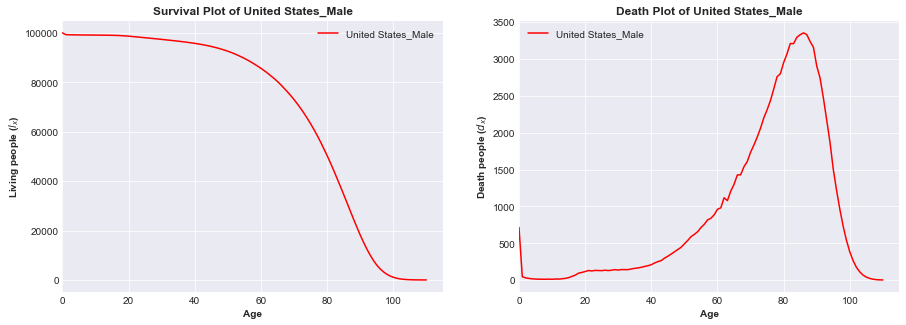

In [5]:
OneLife().lifeplot(usa_male)

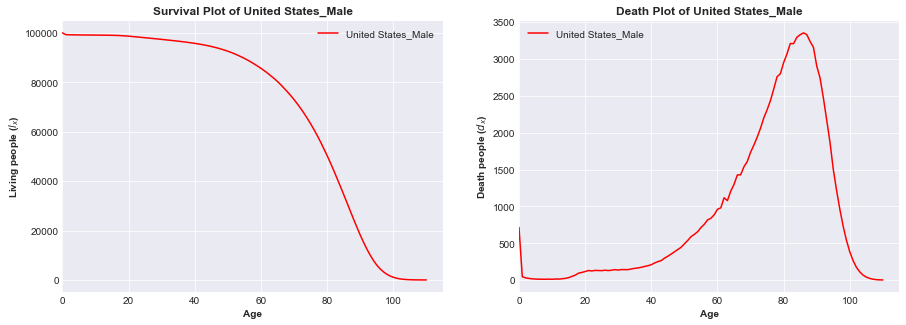

In [6]:
OneLife().lifeplot(usa_male, qx_log=False)

##### Lo quiero para mas coortes? Sigue los mismo pasos de OneLife().lifeplot pero con:
* MultipleLives -> metodo lifeplots
* Por defecto al menos dos parametro. Un tercero puede pasarsele, si tal vez se quiere confrontar con un modelo. Ejemplo:

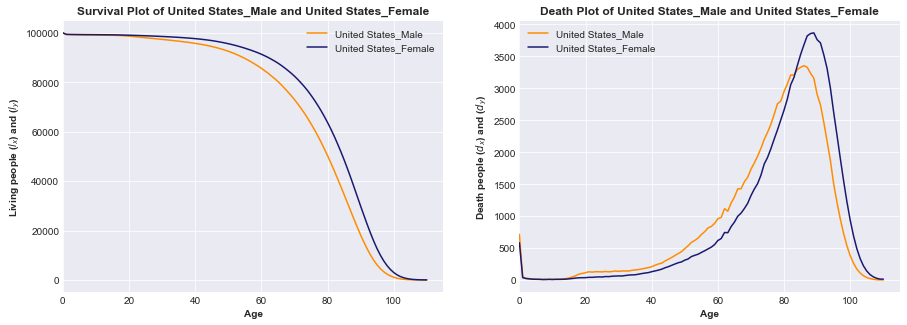

In [7]:
MultipleLives().lifeplots(usa_male, usa_female)

$$F(X) = 1- e^{-0.0001x^{e^{x/115}}}$$


$$S(X) = 1-F(X)= e^{-0.0001x^{e^{x/115}}}$$

$Claramente:$

  \begin{equation}
   1- S(X) = F(X)=
    \begin{cases}
      0, & \text{if}\ x < 0 \\
      1 - e^{-0.0001x^{e^{x/115}}}, & \text{if}\ 0 \le X < 115\\
      1, & \text{if}\ x \geq\ 115
    \end{cases}
  \end{equation}
$F(115) = 1$ si y solo si $1 - e^{-0.0001(115)^{e^{115/115}}}.$ Y por consiguiente $S(115) = 0$.

In [5]:
def vettore(): #FORMULACION DE LA FUNCION DE SUPERVIVENCIA/DISTRIBUCION
    x = np.arange(0,115)
    numera = np.exp(-.0001*x**(np.exp(x/115)))
    l = pd.Series(numera*10**5)
    vettore = l[0:-8].round()
    return vettore
modelo = vettore()
modelo

0      100000.0
1       99990.0
2       99980.0
3       99969.0
4       99958.0
         ...   
102        54.0
103        20.0
104         7.0
105         2.0
106         0.0
Length: 107, dtype: float64

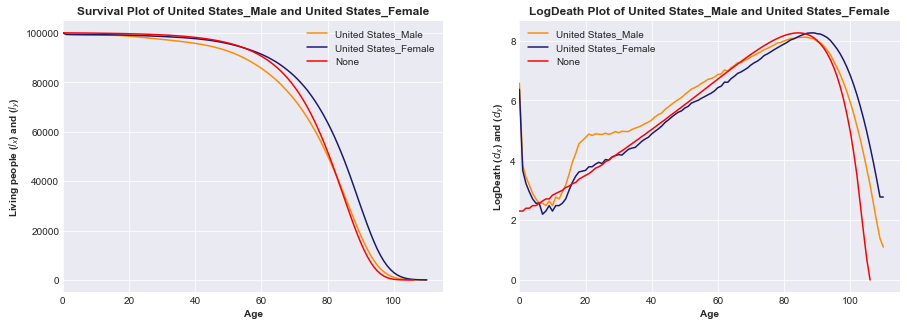

In [16]:
MultipleLives().lifeplots(usa_male, usa_female, modelo, dx_log=True) # Note que son las muertes en log

##### Deseo verlo en modo interactivo, para mas coortes, y que me digan la esperanza de vida? Ejemplo, con las francesas: 
Pasando el raton se observa:
* $Variable:$ se refiere a la coorte observada deseada
* $Age:$ Referida a la edad de la variable observada en cuestion
* $value:$ Referido a living, o sea a los sobrevivientes de la coorte visualizada en cuestion
* *ex1*, *ex2*, *ex3*: Son las esperanzas de vida (abreviada o "curtate"), respectivamente de las variables coortes. Redondeada a 2 cifras decimales.<br> Se sigue el orden de los parametros pasados, o sea, ex3 es la esperanza de las francesas, ex2 mujeres EE.UU. etc..

In [5]:
france = dataset.France_Female # vector lx de las mujeres francesas

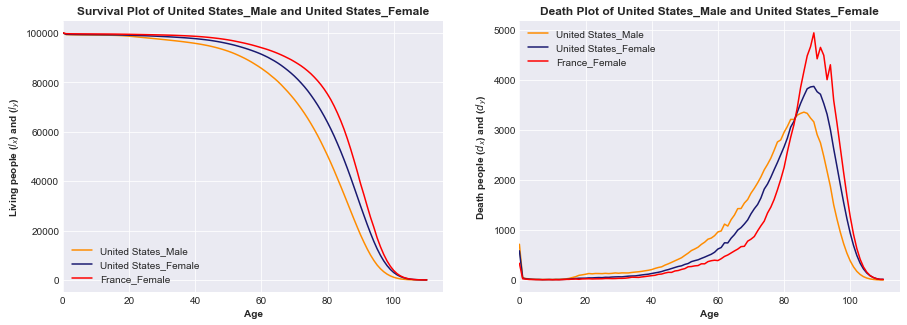

In [15]:
MultipleLives().nuevo(usa_male, usa_female, france, interactive=False)

In [19]:
MultipleLives().lifeplot_2(usa_male, usa_female, france,
                      interactive=True, death=True, qx_log=False) #dx_false=False para dx normal

In [9]:
MultipleLives().nuevo(usa_male, usa_female, modelo, interactive=True, death= True)

**$Nota$ $1$  se usò el metodo 'nuevo' esto es porque aun como se dijo, no es definitiva la lib, por ende tampoco como nombrar las funciones**<br>
**$Nota$ 2 aunque ejecutò el logaritmo de las muertes, en *value* aparecen los valores de las muertes no en logaritmo.**

#### $Dudas$
* 1.1 Como nombrar los metodos? Lifeplot, lifeplots o de otra manera.
* 1.2 En la versiòn interactiva aparecen, variable, age, value, ex1, ex2, ex3. Esta bien o es demasiado redundante?
* 1.3 Por defecto siempre en la version interactiva, ya sea que se vean living, death o death en log. <br>Siempre apareceran ex1, ex2, ex3. (solo ex1, ex2 si las coortes son 2).Esta bien, o solo para living, interesarìa ver las espereanza de vida.
* 1.4 Las esperanzas de vida son curtate, o sea abrevida. Esta bien o es mejor completa? Aunque no cambiarìa tanto, sino sumarle .5.
* 1.5 Los colores estan bien, o sea son de agrado?
* 1.6 Las info que muestra en la version interactiva, en mi opinion son exaustivas, sino es demasiado abrumador. <br>O en vez a demas de estas, otras son de mas interes?
* 1.7 Por defecto estan codificadas para maximo 3 lx. Es suficiente? (en mi opinion màs harìan un poco relajosa la grafica, pero no se)
* 1.8 Alguna otra sugerencias?